# DATA SCIENTIST VS SOFTWARE DEVELOPER SURVEY ANALYSIS

# 1. Business Understanding

A decade ago and even today, data scientist is the most sought after job. However, within the last few years, machine learning has progressed immensely. Model training has become automated with the rise of cloud computing technologies and data scientists barely work on models rather more on data preprocessing which directly involves coding. It is more about playing with the data rather than research and experimentation of different models. This shift in trend is visible and is the reason why data science jobs require more candidates who can demonstrate coding experience. I am curious to find out if this is the case, is it wiser to become a software developer rather than the much-hyped data scientists? Can you break into data science without software development?


## Business Questions

The motivation behind this analysis is to explore how data scientists compare with software developers. I am curious to determine answers to some of the below interesting questions:

- What percentage of professional developers are satisfied in data science career?
- What is the demographic profile of software developers vs data scientists in terms of gender,and sources of education?
- What are the top 10 programming languages data professionals favour and how do they differ from software developers?
- Is professional coding experience required to become data scientists? What is their average professional coding experience?
- Do data scientists prefer to work from home than software developers?
- Among the two, who has a better work life balance?

# Data Understanding


The enclosed data set is the full, cleaned results of the 2019 Stack Overflow Developer Survey. Free response submissions and personally identifying information have been removed from the results to protect the privacy of respondents. There are total three files.

1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
3. so_survey_2019.pdf - PDF file of survey instrument

The survey was fielded from January 23 to February 14, 2019. The median time spent on the survey for qualified responses was 23.3 minutes.

Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, Meta posts, banner ads, and social media posts. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it.

For this notebook, you can find the official published dataset at this link:

https://insights.stackoverflow.com/survey/2019

For previous survey results here, you can access the below link:

https://insights.stackoverflow.com/survey



In [1]:
# Import libraries
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

C:\Users\AB\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read in dataset
survey = pd.read_csv("survey_results_public.csv")
survey.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
survey.shape

(88883, 85)

In [4]:
# Print column names
list(survey.columns.values)

['Respondent',
 'MainBranch',
 'Hobbyist',
 'OpenSourcer',
 'OpenSource',
 'Employment',
 'Country',
 'Student',
 'EdLevel',
 'UndergradMajor',
 'EduOther',
 'OrgSize',
 'DevType',
 'YearsCode',
 'Age1stCode',
 'YearsCodePro',
 'CareerSat',
 'JobSat',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'JobSeek',
 'LastHireDate',
 'LastInt',
 'FizzBuzz',
 'JobFactors',
 'ResumeUpdate',
 'CurrencySymbol',
 'CurrencyDesc',
 'CompTotal',
 'CompFreq',
 'ConvertedComp',
 'WorkWeekHrs',
 'WorkPlan',
 'WorkChallenge',
 'WorkRemote',
 'WorkLoc',
 'ImpSyn',
 'CodeRev',
 'CodeRevHrs',
 'UnitTests',
 'PurchaseHow',
 'PurchaseWhat',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'WebFrameWorkedWith',
 'WebFrameDesireNextYear',
 'MiscTechWorkedWith',
 'MiscTechDesireNextYear',
 'DevEnviron',
 'OpSys',
 'Containers',
 'BlockchainOrg',
 'BlockchainIs',
 'BetterLife',
 'ITperson',
 'OffOn',
 'SocialMedia',
 'Ext

# Data Preparation

#### Exploratory Data Analysis

In [5]:
# Delete rows where DevType is missing
survey = survey[pd.notnull(survey['DevType'])]

In [6]:
# Print size of reduced dataset
print('The reduced dataset contains', np.shape(survey)[0], 'rows and', np.shape(survey)[1], 'columns.')

The reduced dataset contains 81335 rows and 85 columns.


In [7]:
# Look at descriptive statistics for data (ignore Respondent since this is just an ID field)
survey.drop(['Respondent'], axis = 1).describe()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,5.519700e+04,5.508100e+04,63575.000000,49229.000000,73565.000000
mean,5.592667e+11,1.268504e+05,42.105865,5.069760,30.699829
std,7.381436e+13,2.836657e+05,37.405312,5.453745,8.649460
min,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,2.000000e+04,2.575200e+04,40.000000,2.000000,25.000000
50%,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,1.200000e+05,1.000000e+05,44.000000,6.000000,35.000000
max,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [8]:
# Display (top 10) value counts for DevType
survey['DevType'].value_counts().nlargest(10)

Developer, full-stack                                                                                           8433
Developer, back-end                                                                                             4913
Developer, back-end;Developer, front-end;Developer, full-stack                                                  2399
Developer, front-end                                                                                            2212
Developer, mobile                                                                                               2172
Developer, back-end;Developer, full-stack                                                                       2047
Student                                                                                                         1515
Developer, front-end;Developer, full-stack                                                                      1023
Developer, desktop or enterprise applications                   

In [9]:
# Display value counts for Gender
survey['Gender'].value_counts()

Man                                                            71987
Woman                                                           5810
Non-binary, genderqueer, or gender non-conforming                512
Man;Non-binary, genderqueer, or gender non-conforming            164
Woman;Non-binary, genderqueer, or gender non-conforming          147
Woman;Man                                                        113
Woman;Man;Non-binary, genderqueer, or gender non-conforming       55
Name: Gender, dtype: int64

In [10]:
# Display value counts for Age
survey['Age'].value_counts()

25.0    4522
27.0    4314
26.0    4290
28.0    4283
24.0    4268
        ... 
97.0       1
29.5       1
77.0       1
37.5       1
30.8       1
Name: Age, Length: 114, dtype: int64

In [11]:
# Display value counts for FormalEducation
survey['EdLevel'].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              37577
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           18830
Some college/university study without earning a degree                                 9655
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     6356
Associate degree                                                                       2745
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2294
Professional degree (JD, MD, etc.)                                                     1121
Primary/elementary school                                                               760
I never completed any formal education                                                  422
Name: EdLevel, dtype: int64

In [12]:
# Display value counts for UndergradMajor
survey['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          45137
Another engineering discipline (ex. civil, electrical, mechanical)        5845
Information systems, information technology, or system administration     4994
Web development or web design                                             3270
A natural science (ex. biology, chemistry, physics)                       3049
Mathematics or statistics                                                 2775
A business discipline (ex. accounting, finance, marketing)                1737
A humanities discipline (ex. literature, history, philosophy)             1464
A social science (ex. anthropology, psychology, political science)        1277
Fine arts or performing arts (ex. graphic design, music, studio art)      1178
I never declared a major                                                   820
A health science (ex. nursing, pharmacy, radiology)                        288
Name: UndergradMajor, dtype: int64

In [13]:
# Display (top 10) value counts for EducationTypes
survey['EduOther'].value_counts().nlargest(10)

Taught yourself a new language, framework, or tool without taking a formal course                                                                                                                                                                         5761
Taken an online course in programming or software development (e.g. a MOOC);Taught yourself a new language, framework, or tool without taking a formal course                                                                                             5277
Taught yourself a new language, framework, or tool without taking a formal course;Contributed to open source software                                                                                                                                     3407
Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course                         

In [14]:
# Display (top 10) value counts for EducationTypes
survey['EduOther'].nunique()

492

In [15]:
# Display value counts for OpenSourcer
survey['OpenSourcer'].value_counts().nlargest(5)

Never                                                 28860
Less than once per year                               23336
Less than once a month but more than once per year    19160
Once a month or more often                             9979
Name: OpenSourcer, dtype: int64

In [16]:
# Display (top 10) value counts for LanguageWorkedWith
survey['LanguageWorkedWith'].value_counts().nlargest(10)

HTML/CSS;JavaScript;PHP;SQL              1430
C#;HTML/CSS;JavaScript;SQL               1392
HTML/CSS;JavaScript                      1161
C#;HTML/CSS;JavaScript;SQL;TypeScript     980
HTML/CSS;JavaScript;PHP                   870
Java                                      828
HTML/CSS;JavaScript;TypeScript            687
HTML/CSS;Java;JavaScript;SQL              653
Python                                    606
C#                                        514
Name: LanguageWorkedWith, dtype: int64

In [17]:
# Display value counts for YearsCoding
survey['YearsCodePro'].value_counts()

2                     7779
3                     7624
5                     6298
4                     6169
6                     4443
1                     4299
10                    4266
Less than 1 year      3773
7                     3596
8                     3393
12                    2178
15                    2064
20                    1976
9                     1946
11                    1649
13                    1347
18                    1145
14                    1114
16                     766
19                     758
25                     709
22                     669
17                     617
21                     535
30                     498
23                     441
24                     324
28                     213
35                     213
27                     193
26                     192
32                     168
29                     127
33                     126
31                     111
40                     104
34                     101
3

In [18]:
survey['Student'].value_counts()

No                62256
Yes, full-time    12863
Yes, part-time     5143
Name: Student, dtype: int64

In [19]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81335 entries, 1 to 88877
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              81335 non-null  int64  
 1   MainBranch              81071 non-null  object 
 2   Hobbyist                81335 non-null  object 
 3   OpenSourcer             81335 non-null  object 
 4   OpenSource              79748 non-null  object 
 5   Employment              81335 non-null  object 
 6   Country                 81335 non-null  object 
 7   Student                 80262 non-null  object 
 8   EdLevel                 79760 non-null  object 
 9   UndergradMajor          71834 non-null  object 
 10  EduOther                77904 non-null  object 
 11  OrgSize                 70677 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               80974 non-null  object 
 14  Age1stCode              80722 non-null

In [20]:
# Display value counts for JobSatisfaction
survey['CareerSat'].value_counts()

Very satisfied                        28644
Slightly satisfied                    24595
Slightly dissatisfied                  7511
Neither satisfied nor dissatisfied     6993
Very dissatisfied                      3620
Name: CareerSat, dtype: int64

In [21]:
survey['WorkChallenge'].value_counts()

Being tasked with non-development work;Distracting work environment;Meetings                                                2281
Being tasked with non-development work;Meetings;Not enough people for the workload                                          1722
Being tasked with non-development work;Distracting work environment;Not enough people for the workload                      1495
Distracting work environment;Meetings;Not enough people for the workload                                                    1450
Not enough people for the workload                                                                                          1388
                                                                                                                            ... 
Being tasked with non-development work;Toxic work environment                                                                114
Inadequate access to necessary tools;Toxic work environment                                      

In [22]:
survey['BetterLife'].value_counts()

Yes    50323
No     29031
Name: BetterLife, dtype: int64

Since our focus is on data professionals versus software developers and there is a heavy imbalance of classes in column DevType, I have decided to segment it into two categories-

- 1. People with data profile
- 2. People with developer profile


In [24]:
# Create data profile and software developer profile
survey_ds = survey[survey['DevType'].str.contains('Data') == True]
survey_sd = survey[survey['DevType'].str.contains('Developer') == True]

In [25]:
survey_ds['DevType'].count()

17305

In [26]:
survey_sd['DevType'].count()

72491

In [27]:
survey['JobSat'].value_counts()

Slightly satisfied                    23866
Very satisfied                        22029
Slightly dissatisfied                 10582
Neither satisfied nor dissatisfied     8489
Very dissatisfied                      4740
Name: JobSat, dtype: int64

In [28]:
survey.isna().sum().sum()

765390

In [29]:
survey.shape

(81335, 85)

In [30]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81335 entries, 1 to 88877
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              81335 non-null  int64  
 1   MainBranch              81071 non-null  object 
 2   Hobbyist                81335 non-null  object 
 3   OpenSourcer             81335 non-null  object 
 4   OpenSource              79748 non-null  object 
 5   Employment              81335 non-null  object 
 6   Country                 81335 non-null  object 
 7   Student                 80262 non-null  object 
 8   EdLevel                 79760 non-null  object 
 9   UndergradMajor          71834 non-null  object 
 10  EduOther                77904 non-null  object 
 11  OrgSize                 70677 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               80974 non-null  object 
 14  Age1stCode              80722 non-null

In [31]:
# A different dataframe for the other profiles
survey_others = survey[survey['DevType'].str.contains('Data') == False]
survey_others = survey[survey['DevType'].str.contains('Developer') == False]
survey_others

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
11,12,I am a student who is learning to code,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,Canada,"Yes, full-time",Some college/university study without earning ...,Mathematics or statistics,...,Just as welcome now as I felt last year,Courses on technologies you're interested in,21.0,Woman,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
14,15,I am a student who is learning to code,Yes,Never,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,20.0,Man,No,NaN,NaN,Yes,Too long,Neither easy nor difficult
17,18,"I am not primarily a developer, but I write co...",Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Russian Federation,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,NaN,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
29,30,I am a developer by profession,No,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Switzerland,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,NaN,Tech meetups or events in your area,28.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88859,85642,NaN,No,Less than once per year,"OSS is, on average, of LOWER quality than prop...","Independent contractor, freelancer, or self-em...",United States,No,Associate degree,"Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,34.0,"Non-binary, genderqueer, or gender non-conforming",NaN,Bisexual;Gay or Lesbian,White or of European descent,No,Appropriate in length,Easy
88864,86012,NaN,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...",...,Not applicable - I did not use Stack Overflow ...,Industry news about technologies you're intere...,24.0,Man,No,NaN,South Asian,NaN,Appropriate in length,Easy
88867,86806,NaN,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,Nigeria,"Yes, part-time","Secondary school (e.g. American high school, G...",NaN,...,A lot less welcome now than last year,Tech articles written by other developers,19.0,Man,No,NaN,Black or of African descent;Middle Eastern,No,Appropriate in length,Neither easy nor difficult
88871,87386,NaN,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...","Independent contractor, freelancer, or self-em...",Italy,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,21.0,Man,No,Straight 

##### The above dataframe occupies only about less than 10% of the data. We will not consider this section since they are from different profiles who are students, managers, and unemployed people with an interest in coding. Our focus is not on this group, but mostly on data scientists and professional developers.

In [32]:
survey_sd

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,84299,NaN,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,India,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Somewhat more welcome now than last year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88854,84539,NaN,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Courses on technologies you're interested in,23.0,Woman,Yes,Bisexual,White or of European descent,No,Appropriate in length,Easy
88872,87739,NaN,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,Czech Republic,"Yes, full-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,25.0,NaN,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
88876,88212,NaN,No,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Spain,No,"Secondary school (e.g. American high school, G...",NaN,...,NaN,Tech articles written by other developers;Indu...,40.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy


In [33]:
survey_ds['MainBranch'].value_counts()

I am a developer by profession                                                   12443
I am not primarily a developer, but I write code sometimes as part of my work     2863
I am a student who is learning to code                                            1207
I code primarily as a hobby                                                        379
I used to be a developer by profession, but no longer am                           342
Name: MainBranch, dtype: int64

# Data Modelling and Evaluation

# ** How many professional developers are satisfied in data science career?*

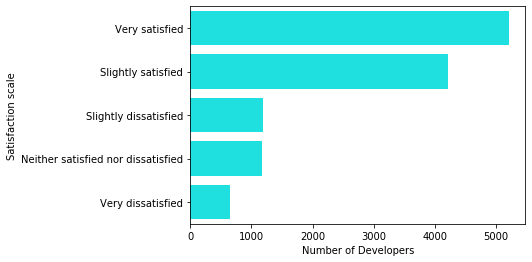

In [34]:
data_ds = survey_ds[survey_ds['MainBranch']=='I am a developer by profession']
plot_data=data_ds['CareerSat'].value_counts().reset_index()
plot_data.rename(columns={'index':'Satisfaction scale','CareerSat':'Number of Developers'},inplace=True)
sns.barplot(y='Satisfaction scale',x='Number of Developers',data=plot_data, color='aqua')

# ** How many professional developers are satisfied in data science jobs?*

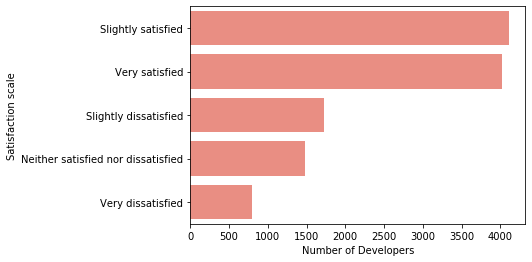

In [35]:
data_ds = survey_ds[survey_ds['MainBranch']=='I am a developer by profession']
plot_data=data_ds['JobSat'].value_counts().reset_index()
plot_data.rename(columns={'index':'Satisfaction scale','JobSat':'Number of Developers'},inplace=True)
sns.barplot(y='Satisfaction scale',x='Number of Developers',data=plot_data, color='salmon')

In [36]:
data_sd = survey_sd[survey_sd['MainBranch']=='I am a developer by profession']
data_sd['MainBranch'].value_counts()

I am a developer by profession    61987
Name: MainBranch, dtype: int64

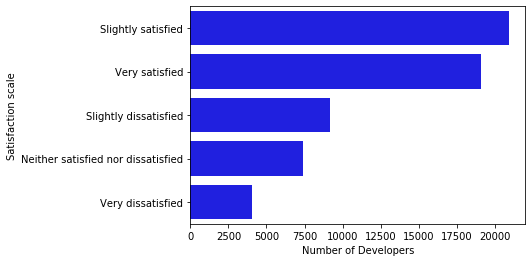

In [37]:
data_sd = survey_sd[survey_sd['MainBranch']=='I am a developer by profession']
plot_data=data_sd['JobSat'].value_counts().reset_index()
plot_data.rename(columns={'index':'Satisfaction scale','JobSat':'Number of Developers'},inplace=True)
sns.barplot(y='Satisfaction scale',x='Number of Developers',data=plot_data, color='blue')

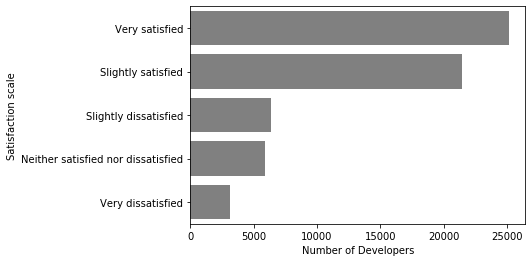

In [38]:
data_sd = survey_sd[survey_sd['MainBranch']=='I am a developer by profession']
plot_data=data_sd['CareerSat'].value_counts().reset_index()
plot_data.rename(columns={'index':'Satisfaction scale','CareerSat':'Number of Developers'},inplace=True)
sns.barplot(y='Satisfaction scale',x='Number of Developers',data=plot_data, color='grey')

In [39]:
data_sd = survey_sd[survey_sd['MainBranch']=='I am a developer by profession']
data_sd.shape

(61987, 85)

In [40]:
survey_ds['Gender'].unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

##### We will create a function to handle the categorical variables such as Gender, Education Level, Undergraduate Major, Satisfaction scales, Coding Experience to make our visualizations and plotting easier. These are the top 5 important features for our analysis.

In [41]:
# Simplify Gender
def simplify_gender(df):
    """Add a new field, Gender_New, to dataframe, containing simplified Gender values.
    
    Args:
    df: dataframe. Dataframe containing the field Gender.
       
    Returns:
    df: dataframe. Modified version of the input dataframe containing a new field, Gender_New.
    """
    conditions_gender = [(df['Gender'] == 'Man'),
                         (df['Gender'] == 'Woman'),
                         (df['Gender'] != 'Man') & (df['Gender'] != 'Woman') 
                         & (pd.isnull(df['Gender']) == False)]

    choices_gender = ['Male', 'Female', 'Other']

    df['Gender_New'] = np.select(conditions_gender, choices_gender, default = np.NaN)
    
    return df
                
# Apply function to subsets
survey_ds = simplify_gender(survey_ds)
survey_sd = simplify_gender(survey_sd)

In [42]:
# Simplify EdLevel
def simplify_ed(df):
    """Add a new field, FormalEducation_New, to dataframe, containing simplified FormalEducation values.
    
    Args:
    df: dataframe. Dataframe containing the field FormalEducation.
       
    Returns:
    df: dataframe. Modified version of the input dataframe containing a new field, FormalEducation_New.
    """
    conditions_ed = [(df['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'),
                     (df['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
                     (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),   
                     (df['EdLevel'] == 'Associate degree'),
                     (df['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
                     (df['EdLevel'] == 'Some college/university study without earning a degree') 
                     | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)') 
                     | (df['EdLevel'] == 'Primary/elementary school')
                     | (df['EdLevel'] == 'I never completed any formal education')]

    choices_ed = ['Bachelors', 'Masters', 'Professional', 'Associate', 'Doctorate', 'No Degree']

    df['FormalEducation_New'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    
    return df

# Apply function to subsets
survey_ds = simplify_ed(survey_ds)
survey_sd = simplify_ed(survey_sd)

In [43]:
# Simplify Undergraduate Major
def simplify_major(df):
    """Add a new field, UndergradMajor_New, to dataframe, containing simplified UndergradMajor values.
    
    Args:
    df: dataframe. Dataframe containing the field UndergradMajor.
       
    Returns:
    df: dataframe. Modified version of the input dataframe containing a new field, UndergradMajor_New.
    """
    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'),
                        (df['UndergradMajor'] == 'Another engineering discipline (ex. civil, electrical, mechanical)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'),
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'A natural science (ex. biology, chemistry, physics)')
                        |(df['UndergradMajor'] == 'A health science (ex. nursing, pharmacy, radiology)'),
                        (df['UndergradMajor'] == 'Web development or web design'),
                        (df['UndergradMajor'] == 'A business discipline (ex. accounting, finance, marketing)'),
                        (df['UndergradMajor'] == 'A humanities discipline (ex. literature, history, philosophy)')
                        | (df['UndergradMajor'] == 'A social science (ex. anthropology, psychology, political science)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (ex. graphic design, music, studio art)')]

    choices_major = ['Computer Science', 'Engineering', 'IT/Info Systems', 'Math/Statistics', 'Other Science',
                     'Web Design/Development', 'Business', 'Arts/Humanities/Social Science']

    df['UndergradMajor_New'] = np.select(conditions_major, choices_major, default = np.NaN)
    
    return df

# Apply function to subsets
survey_ds = simplify_major(survey_ds)
survey_sd = simplify_major(survey_sd)

In [44]:
survey['Age'].isna()

1        False
2        False
3        False
4        False
5        False
         ...  
88871    False
88872    False
88875     True
88876    False
88877     True
Name: Age, Length: 81335, dtype: bool

In [46]:
# Convert YearsCoding and YearsCodingProf to numeric
def convert_coding(df, col, new_col):
    """Add a new field, new_col, to dataframe, containing numeric values equivalent to the midpoints of the corresponding
    col range values.
    
    Args:
    df: dataframe. Dataframe containing the field col.
       
    Returns:
    df: dataframe. Modified version of the input dataframe containing a new field, new_col.
    """
    conditions_coding = [
                         (df[col] == 'Less than 1 year'),
                         (df[col] == 'More than 50 years')]
    
    choices_coding = [1, 51]
    
    df[new_col] = np.select(conditions_coding, choices_coding, default = np.NaN)
    
    return df

# Apply function to subsets
survey_ds = convert_coding(survey_ds, 'YearsCode', 'YearsCode_Num')
survey_ds = convert_coding(survey_ds, 'YearsCodePro', 'YearsCodePro_Num')

survey_sd = convert_coding(survey_sd, 'YearsCode', 'YearsCode_Num')
survey_sd = convert_coding(survey_sd, 'YearsCodePro', 'YearsCodePro_Num')

In [47]:
# Convert satisfaction scales to numeric scales
def convert_scale(df, col, new_col):
    """Add a new field, new_col, to dataframe, containing numeric equivalents to the categorical scale reflected in col
    
    Args:
    df: dataframe. Dataframe containing the field col.
       
    Returns:
    df: dataframe. Modified version of the input dataframe containing a new field, new_col.
    """
    conditions_sat = [(df[col] == 'Very dissatisfied'),
                     (df[col] == 'Slightly dissatisfied'),
                     (df[col] == 'Neither satisfied nor dissatisfied'),
                     (df[col] == 'Slightly satisfied'),
                     (df[col] == 'Very satisfied')]
    
    choices_sat = [1, 2, 3, 4, 5]
    
    df[new_col] = np.select(conditions_sat, choices_sat, default = np.NaN)
    
    return df

# Apply function to subsets
survey_ds = convert_scale(survey_ds, 'JobSat', 'JobSat_Num')
survey_ds = convert_scale(survey_ds, 'CareerSat', 'CareerSat_Num')

survey_sd = convert_scale(survey_sd, 'JobSat', 'JobSat_Num')
survey_sd = convert_scale(survey_sd, 'CareerSat', 'CareerSat_Num')

In [48]:
survey_ds['JobSat'].value_counts()

Slightly satisfied                    5045
Very satisfied                        4867
Slightly dissatisfied                 2205
Neither satisfied nor dissatisfied    1801
Very dissatisfied                      992
Name: JobSat, dtype: int64

Splitting Multi-Selection Fields

For the fields where multiple selections were possible (i.e. EducationTypes and LanguageWorkedWith), I have split the strings containing the multiple selections into a list of selections and then concatenate these lists into a single list (dropping any missing values in the process). In the case of EducationTypes, it is good to simplify these fields to reduce the length of category labels and to group similar categories into a single category.

In [49]:
# Create dataframe containing split string values by respondent number
def split_list(df, col):
    """Create a new dataframe that splits the values of multi-selection column col into individual selections and 
    places each selection value on a separate row. This new dataframe can be linked back to the original dataframe by 
    Respondent value.
    
    Args:
    df: dataframe. Dataframe containing the multi-selection field col.
       
    Returns:
    out_df: dataframe. New dataframe giving split values of col.
    """
    in_res = list(df['Respondent'])
    in_list = list(df[col])
    
    out_res = []
    out_list = []
    
    for i in range(len(in_list)):
        if pd.isnull(in_list[i]) == False:
            vals = in_list[i].split(';')
            res = [in_res[i]]*len(vals)
            
            out_list.append(vals)
            out_res.append(res)
    
    out_df = pd.DataFrame({'Respondent': list(np.concatenate(out_res)), col: list(np.concatenate(out_list))})
    
    return out_df

In [50]:
survey_ds['EduOther'].unique()

array(['Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course',
       'Taken an online course in programming or software development (e.g. a MOOC);Participated in a full-time developer training program or bootcamp;Taken a part-time in-person course in programming or software development;Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course;Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder);Contributed to open source software',
       nan,
       'Taken an online course in programming or software development (e.g. a MOOC);Taught yourself a new language, framework, or tool without taking a formal course',
       'Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in soft

In [51]:
# Split EducationOther
ed_other_ds = split_list(survey_ds, 'EduOther')
ed_other_sd = split_list(survey_sd, 'EduOther')
    
# Simplify category labels
def convert_ed_type(df):
    """Add a new field, EducationTypes_New, to dataframe, containing simplified EducationTypes values.
    
    Args:
    df: dataframe. Dataframe containing the field EducationTypes.
       
    Returns:
    df: dataframe. Modified version of the input dataframe containing a new field, EducationTypes_New.
    """
    conditions_edtype = [(df['EduOther'] == 'Taken a part-time in-person course in programming or software development'),
                         (df['EduOther'] == 'Taken an online course in programming or software development (e.g. a MOOC)'),
                         (df['EduOther'] == 'Completed an industry certification program (e.g. MCPD)'),
                         (df['EduOther'] == 'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)'),
                         (df['EduOther'] == 'Contributed to open source software'), 
                         (df['EduOther'] == 'Taught yourself a new language, framework, or tool without taking a formal course'),
                         (df['EduOther'] == 'Participated in a hackathon'),
                         (df['EduOther'] == 'Received on-the-job training in software development'),
                         (df['EduOther'] == 'Participated in a full-time developer training program or bootcamp')]  
    
    choices_edtype = ['Part Time In-Person Course', 'Online Course', 'Industry Certification', 
                      'Online Coding Competition', 'Open Source', 'Self Taught',
                      'Hackathon', 'On-the-Job Training', 'Full Time Course/Bootcamp']

    df['EducationTypes_New'] = np.select(conditions_edtype, choices_edtype, default = np.NaN)
    
    return df

ed_other_ds = convert_ed_type(ed_other_ds)
ed_other_sd = convert_ed_type(ed_other_sd)

In [52]:
# Split LanguageWorkedWith
languages_ds = split_list(survey_ds, 'LanguageWorkedWith')
languages_sd = split_list(survey_sd, 'LanguageWorkedWith')

In [53]:
survey_sd['LanguageWorkedWith'].unique()

array(['C++;HTML/CSS;Python', 'HTML/CSS', 'C;C++;C#;Python;SQL', ...,
       'Assembly;Bash/Shell/PowerShell;C;C++;C#;HTML/CSS;Java;JavaScript;Objective-C;PHP;Python;R;SQL;Swift;Other(s):',
       'Bash/Shell/PowerShell;Elixir;Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript',
       'Go;HTML/CSS;Java;JavaScript;Kotlin;Python;Swift;TypeScript'],
      dtype=object)

In [54]:
# Compare the distribution of the two subsets for specified column
# Get proportion of dataset by category
def get_proportions(df, col, index_order = None, drop = True, multi = False):
    """Calculate the proportion of all observations in a given dataframe for each value of the selected 
    field (excl. missing values)
    
    Args:
    df: dataframe. Dataframe to be summarized.
    col: string. Column in df to be summarized.
    drop: boolean. Drop 'nan' values.
    multi: boolean. If True then multiple observations are possible for single respondent.
       
    Returns:
    props: dataframe. Summary dataframe giving the proportion of all observations by col value (excluding missing values).
    """
    # Summarize by column value
    summary = df[['Respondent', col]].groupby([col]).count()
    
    # Drop NaN values
    if drop:
        summary = summary.drop('nan')

    # Convert sums to proportions
    if multi:
        props = summary/df['Respondent'].nunique()
    
    else:
        props = summary/summary['Respondent'].sum()
        
    
    # Sort rows in order specified
    if index_order != None:
        props = props.reindex(index_order)
        
    # Convert index into column
    # Code reference: https://stackoverflow.com/questions/20461165/how-to-convert-pandas-index-in-a-dataframe-to-a-column
    props.reset_index(level=0, inplace=True)
    
    return props

# Create summary dataset for comparing the two subsets
def create_summary(df_ds, df_non_ds, col, index_order = None, drop = True, multi = False):
    """Create summary dataframe giving the proportion of all observations for each value of the selected field (excl. 
    missing values), for data scientists and non-data scientists.
    
    Args:
    df_ds: dataframe. Data scientist dataframe to be summarized.
    df_non_ds: dataframe. Non-data scientist dataframe to be summarized.
    col: string. Column to be summarized.
    index_order: list. List giving order in which categories should be sorted.
    drop: boolean. Drop 'nan' values .
    multi: boolean. If true then multiple observations are possible for single respondent.
       
    Returns:
    out_df: dataframe. Summary dataframe giving the proportion of data scientist and non-data scientist 
            observations by col value.
    """    
    # Get proportions for each subset
    props_ds = get_proportions(df_ds, col, index_order, drop, multi)
    props_sd = get_proportions(df_sd, col, index_order, drop, multi)
    
    # Rename respondent column
    props_ds = props_ds.rename(columns = {'Respondent':'Data Scientists'})
    props_sd = props_sd.rename(columns = {'Respondent':'Software Developers'})
    
    # Merge dataframes
    props_all = pd.merge(props_sd, props_ds, how = 'outer', on = col)
    
    # Replace any missing values with zeros
    props_all = props_all.fillna(0)

    return props_all

### Function to create a bar plot to explore answers to our questions~

In [55]:
# Create comparison plot
def create_bar_plot(df, col, x_lab, title, rot = 0):
    """Plot summary dataframe
    
    Args:
    df: dataframe. Summary dataframe for plotting.
    col: string. Column containing class labels.
    x_lab: string. X-axis label.
    title: string. Plot title.
    rot: int or float. X-axis label rotation angle.
       
    Returns:
    None
    """    
    # Change df to long form
    long = pd.melt(df, id_vars=col, var_name='DevType', value_name='Proportion')
    
    # Create plot
    sns.factorplot(x=col, y='Proportion', hue='DevType', data=long, kind='bar', legend = True, color='maroon');
    
    # Set plot labels
    plt.xlabel(x_lab)
    plt.title(title)
    
    
    plt.xticks(rotation=rot)

# ** Demographic Profile: Data Scientists vs Software Developers*

In [56]:
# Create summary dataframe
gender_props = create_summary(survey_ds, survey_sd, 'Gender_New')

print(gender_props)

  Gender_New  Software Developers  Data Scientists
0     Female             0.069423          0.06263
1       Male             0.918443          0.92210
2      Other             0.012135          0.01527


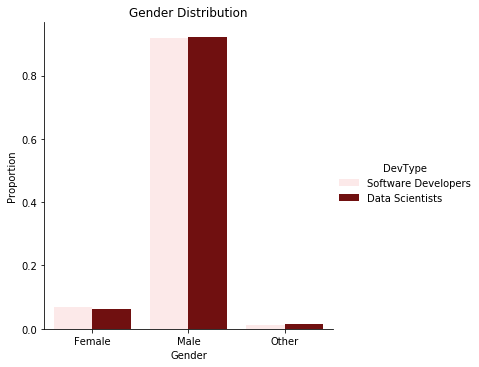

In [57]:
# Create comparison plot
create_bar_plot(gender_props, 'Gender_New', 'Gender', 'Gender Distribution')

In [58]:
# Create summary dataframe
ed_props = create_summary(survey_ds, survey_sd, 'FormalEducation_New', index_order = ['No Degree',
            'Associate', 'Bachelors', 'Masters', 'Doctorate', 'Professional'])

print(ed_props)

  FormalEducation_New  Software Developers  Data Scientists
0           No Degree             0.212562         0.215520
1           Associate             0.035420         0.036028
2           Bachelors             0.488606         0.414057
3             Masters             0.229498         0.260923
4           Doctorate             0.019820         0.056253
5        Professional             0.014095         0.017218


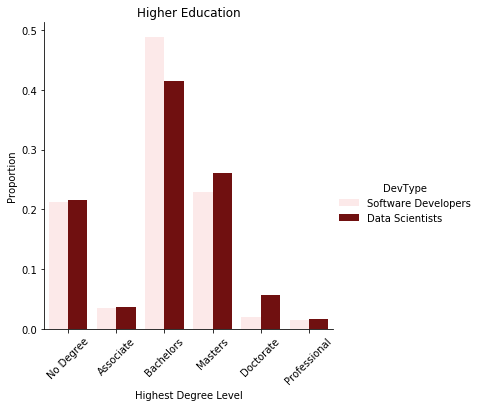

In [59]:
# Create comparison plot
create_bar_plot(ed_props, 'FormalEducation_New', 'Highest Degree Level', 'Higher Education', 
                rot = 45)

In [60]:
# Create summary dataframe
major_props = create_summary(survey_ds, survey_sd, 'UndergradMajor_New')

print(major_props)

               UndergradMajor_New  Software Developers  Data Scientists
0  Arts/Humanities/Social Science             0.051739         0.056464
1                        Business             0.021685         0.037466
2                Computer Science             0.659779         0.562388
3                     Engineering             0.078213         0.081221
4                 IT/Info Systems             0.069498         0.081684
5                 Math/Statistics             0.031609         0.071556
6                   Other Science             0.037623         0.073343
7          Web Design/Development             0.049855         0.035877


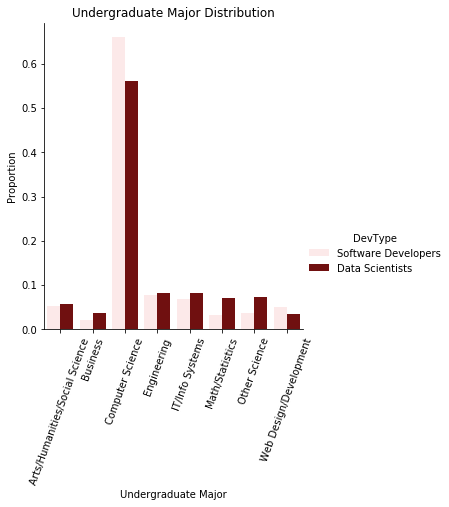

In [61]:
# Create comparison plot
create_bar_plot(major_props, 'UndergradMajor_New', 'Undergraduate Major', 'Undergraduate Major Distribution', 
                rot = 70)

In [95]:
ds_source=ed_other_ds.rename(columns={'EducationTypes_New':'Source of Education'})
sd_source=ed_other_sd.rename(columns={'EducationTypes_New':'Source of Education'})

In [96]:
# Create summary dataframe
ed_types_props = create_summary(ds_source, sd_source, 'Source of Education', drop = False, multi = True)

# Create difference plot
ed_types_props['Difference'] = ed_types_props['Data Scientists'] - ed_types_props['Software Developers']
ed_types_props.style.bar(subset = ['Difference'], align = 'mid', color = ['#d65f5f', '#5fba7d'])

,Source of Education,Software Developers,Data Scientists,Difference
0,Full Time Course/Bootcamp,0.164458,0.171565,0.007107
1,Hackathon,0.270694,0.262116,-0.008578
2,Industry Certification,0.159901,0.185812,0.025912
3,On-the-Job Training,0.424226,0.413174,-0.011052
4,Online Coding Competition,0.261536,0.260209,-0.001328
5,Online Course,0.600572,0.646855,0.046283
6,Open Source,0.422544,0.445902,0.023358
7,Part Time In-Person Course,0.190434,0.227779,0.037345
8,Self Taught,0.860628,0.877258,0.016630


The most popular education method among both data scientists and software developers is self teaching, followed by taking an online course and participating in an open source project. However, we can see from the comparison table that data scientists are more oriented towards external sources of knowledge. Industry certification, online courses and part time courses have  gained traction. This demonstrates the trend people all over the world are following when diving into the field of data science.

# ** Which programming languages do data scientists favour and is there any overlap with software developers?*

In [63]:
# Create summary dataframe
language_props = create_summary(languages_ds, languages_sd, 'LanguageWorkedWith', drop = False, multi = True)

# Create difference plot
language_props['Diff'] = language_props['Data Scientists'] - language_props['Software Developers']
language_props.style.bar(subset = ['Diff'], align = 'mid', color = ['#d65f5f', '#5fba7d'])

,LanguageWorkedWith,Software Developers,Data Scientists,Diff
0,Assembly,0.057081,0.069900,0.012819
1,Bash/Shell/PowerShell,0.363854,0.433860,0.070006
2,C,0.188095,0.207544,0.019449
3,C#,0.332194,0.327873,-0.004322
4,C++,0.218045,0.242815,0.024769
5,Clojure,0.014781,0.015391,0.000610
6,Dart,0.020199,0.018422,-0.001776
7,Elixir,0.015656,0.015857,0.000201
8,Erlang,0.009141,0.012068,0.002927
9,F#,0.011683,0.013234,0.001551


In [64]:
# Get top 10 languages used by data scientists
ctr_ds = Counter(languages_ds['LanguageWorkedWith']).most_common(10)
print(ctr_ds)

top10_ds = list(list(zip(*ctr_ds))[0])

[('SQL', 12338), ('JavaScript', 11377), ('HTML/CSS', 11165), ('Python', 9396), ('Bash/Shell/PowerShell', 7442), ('Java', 6379), ('C#', 5624), ('PHP', 5474), ('C++', 4165), ('C', 3560)]


In [65]:
# Get top 10 languages used by non-data scientists
ctr_non_ds = Counter(languages_sd['LanguageWorkedWith']).most_common(10)
print(ctr_non_ds)

top10_non_ds = list(list(zip(*ctr_non_ds))[0])

[('JavaScript', 52146), ('HTML/CSS', 47629), ('SQL', 40938), ('Java', 30010), ('Python', 27052), ('Bash/Shell/PowerShell', 26192), ('C#', 23913), ('PHP', 19999), ('TypeScript', 17416), ('C++', 15696)]


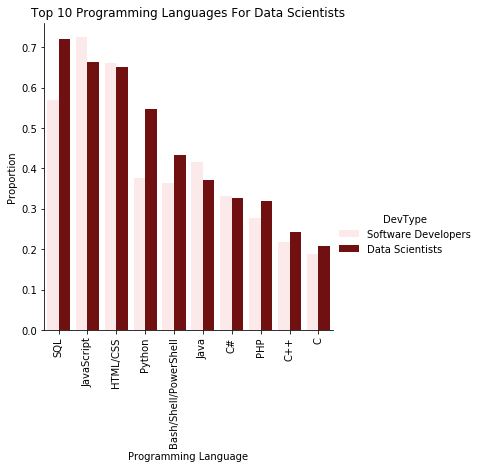

In [66]:
# Create top 10 languages comparison plot for data scientists
top10_props_ds = language_props[language_props['LanguageWorkedWith'].isin(top10_ds)].sort_values('Data Scientists', ascending = False)
top10_props_ds.drop('Diff', axis = 1, inplace = True)

create_bar_plot(top10_props_ds, 'LanguageWorkedWith', 'Programming Language', 
                'Top 10 Programming Languages For Data Scientists', rot = 90)

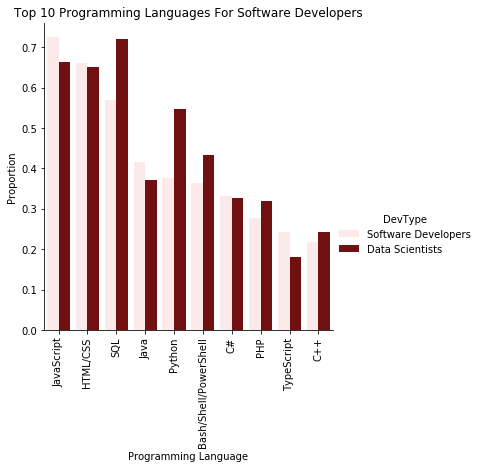

In [67]:
# Create top 10 languages comparison plot for non-data scientists
top10_props_non_ds = language_props[language_props['LanguageWorkedWith'].isin(top10_non_ds)].sort_values('Software Developers', ascending = False)
top10_props_non_ds.drop('Diff', axis = 1, inplace = True)

create_bar_plot(top10_props_non_ds, 'LanguageWorkedWith', 'Programming Language', 
                'Top 10 Programming Languages For Software Developers', rot = 90)

There are lots of overlaps between the top 10 programming languages used by data scientists and software developers. Data scientists are much more likely use Python, SQL, shell scripting, bash. While software developers are more likely to program in HTML, CSS, JavaScript and Java. Nonetheless, data scientists are also competing with the developers in front-end development. This could be because data storytelling is associated with how you present your findings. In this context, no wonder HTML/CSS and JavaScript are becoming common among data professionals.

# ** How much professional coding experience do data scientists have compared to software developers?*

In [68]:
# Create summary dataframe
coding_props = create_summary(survey_ds, survey_sd, 'YearsCode',  index_order = ['Less than 1 year','1','2','3','4','5','6','7','8','9','10','15','20','25','30','35','40','45','50','More than 50 years'], drop = False)

print(coding_props)

             YearsCode  Software Developers  Data Scientists
0     Less than 1 year             0.008391         0.009171
1                    1             0.014732         0.013292
2                    2             0.035279         0.033142
3                    3             0.049831         0.048465
4                    4             0.059329         0.057635
5                    5             0.076664         0.072610
6                    6             0.070807         0.063672
7                    7             0.062943         0.052644
8                    8             0.063940         0.057403
9                    9             0.041191         0.034593
10                  10             0.081012         0.078646
11                  15             0.048696         0.048987
12                  20             0.044279         0.049161
13                  25             0.019813         0.026409
14                  30             0.017584         0.023855
15                  35  

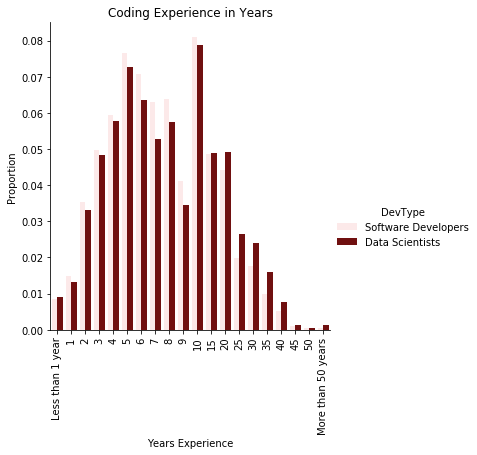

In [69]:
# Create comparison plot
create_bar_plot(coding_props, 'YearsCode', 'Years Experience', 'Coding Experience in Years', rot = 90)

In [70]:
# Create summary dataframe
coding_prof_props = create_summary(survey_ds, survey_sd, 'YearsCodePro',  index_order = ['Less than 1 year','1','2','3','4','5','6','7','8','9','10','15','20','25','30','35','40','45','50','More than 50 years'], drop = False)

print(coding_prof_props)

          YearsCodePro  Software Developers  Data Scientists
0     Less than 1 year             0.049723         0.042377
1                    1             0.058263         0.054430
2                    2             0.106323         0.101808
3                    3             0.105175         0.101423
4                    4             0.086374         0.079754
5                    5             0.087462         0.082767
6                    6             0.062585         0.055840
7                    7             0.050479         0.045262
8                    8             0.047744         0.044557
9                    9             0.027446         0.028145
10                  10             0.058550         0.061995
11                  15             0.028277         0.031350
12                  20             0.026509         0.034812
13                  25             0.009612         0.014297
14                  30             0.006635         0.010065
15                  35  

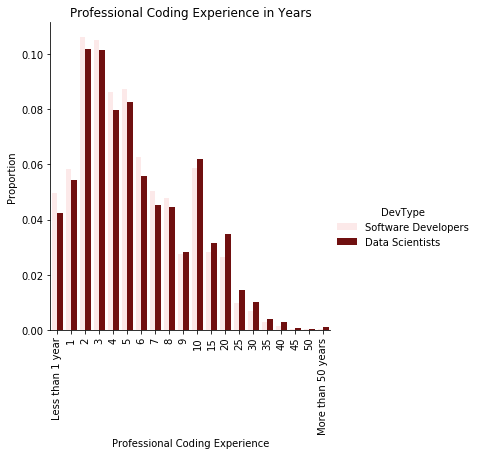

In [71]:
# Create comparison plot
create_bar_plot(coding_prof_props, 'YearsCodePro', 'Professional Coding Experience', 
                'Professional Coding Experience in Years', rot = 90)

Most data scientists have professional coding experience of 2-4 years which is less as expected when compared to software developers. This makes sense because data scientists must demonstrate some coding experience to excel in their field.

In [72]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81335 entries, 1 to 88877
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              81335 non-null  int64  
 1   MainBranch              81071 non-null  object 
 2   Hobbyist                81335 non-null  object 
 3   OpenSourcer             81335 non-null  object 
 4   OpenSource              79748 non-null  object 
 5   Employment              81335 non-null  object 
 6   Country                 81335 non-null  object 
 7   Student                 80262 non-null  object 
 8   EdLevel                 79760 non-null  object 
 9   UndergradMajor          71834 non-null  object 
 10  EduOther                77904 non-null  object 
 11  OrgSize                 70677 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               80974 non-null  object 
 14  Age1stCode              80722 non-null

# ** Work Location Preference among Data Scientists vs Software developers* 

In [73]:
survey['WorkLoc'].value_counts()

Office                                            39964
Home                                              22860
Other place, such as a coworking space or cafe     6062
Name: WorkLoc, dtype: int64

In [74]:
# Convert Age to numeric
def convert_workloc(df):
    """Add a new field, Age_Num, to dataframe, containing numeric values equivalent to the midpoints of the corresponding
    Age range values.
    
    Args:
    df: dataframe. Dataframe containing the field Age.
       
    Returns:
    df: dataframe. Modified version of the input dataframe containing a new field, Age_Num.
    """
    conditions_work = [(df['WorkLoc'] == 'Home'),
                      (df['WorkLoc'] == 'Office'),
                       (df['WorkLoc']== 'Other place, such as a coworking space or cafe')]

    choices_work = ['Work from Home','Office','Other place, such as a coworking space or cafe']

    df['Better_Life'] = np.select(conditions_work, choices_work, default = np.NaN)
    
    return df

# Apply function to subsets
survey_ds = convert_workloc(survey_ds)
survey_sd = convert_workloc(survey_sd)

In [75]:
# Create summary dataframe
work_loc = create_summary(survey_ds, survey_sd, 'WorkLoc',  index_order = ['Work from Home','Office','Other place, such as a coworking space or cafe'], drop = False)

print(work_loc)

                                          WorkLoc  Software Developers  \
0                                  Work from Home             0.000000   
1                                          Office             0.577878   
2  Other place, such as a coworking space or cafe             0.086850   

   Data Scientists  
0         0.000000  
1         0.540403  
2         0.099396  


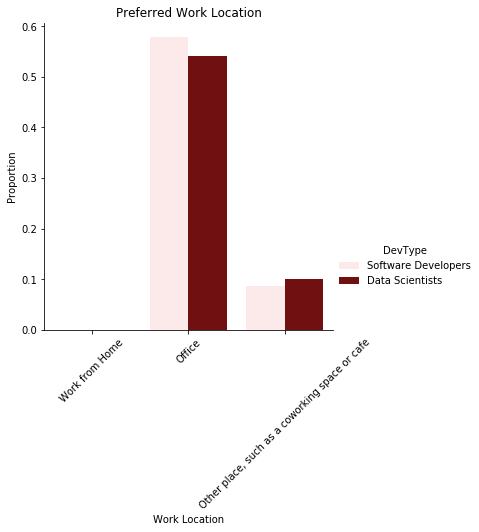

In [76]:
# Create comparison plot
create_bar_plot(work_loc, 'WorkLoc', 'Work Location', 
                'Preferred Work Location', rot = 45)

**This is not strange because the survey responses of our dataset is for the year 2019, when coronavirus was not a thing. I am looking forward to do analysis for the year 2020 because I am definitely sure the results for the work preference would be contrary to this one? Which one do you think would be the most dominant answer? This should be an easy guess.*

# ** Who spends a better life: Software Developers or Data Scientists?*

In [77]:
survey['BetterLife'].unique()

array(['Yes', 'No', nan], dtype=object)

In [78]:
# Convert Age to numeric
def convert_betterlife(df):
    """Add a new field, Age_Num, to dataframe, containing numeric values equivalent to the midpoints of the corresponding
    Age range values.
    
    Args:
    df: dataframe. Dataframe containing the field Age.
       
    Returns:
    df: dataframe. Modified version of the input dataframe containing a new field, Age_Num.
    """
    conditions_life = [(df['BetterLife'] == 'Yes'),
                      (df['BetterLife'] == 'No')]

    choices_life = ['Yes','No']

    df['Better_Life'] = np.select(conditions_life, choices_life, default = np.NaN)
    
    return df

# Apply function to subsets
survey_ds = convert_betterlife(survey_ds)
survey_sd = convert_betterlife(survey_sd)

In [79]:
# Create summary dataframe
better_life = create_summary(survey_ds, survey_sd, 'BetterLife',  index_order = ['Yes','No'], drop = False)

print(better_life)

  BetterLife  Software Developers  Data Scientists
0        Yes             0.635297         0.627664
1         No             0.364703         0.372336


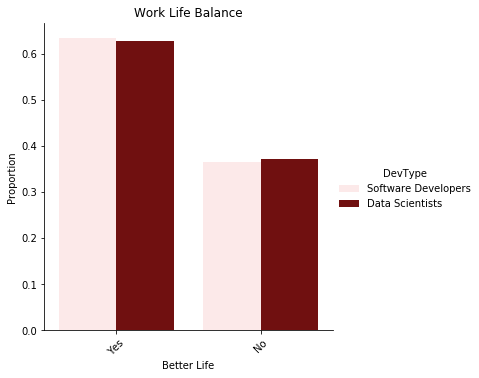

In [80]:
# Create comparison plot
create_bar_plot(better_life, 'BetterLife', 'Better Life', 
                'Work Life Balance', rot = 45)

We see that software developers and data scientists are quite similar in their work life balance. Almost equal proportions of the two groups either enjoy their profession on a same scale or they simply don't enjoy both. 

# ** Deployment*

### **Please visit the blog post to retain a broader picture of this analysis!*